# **Predicting Potential Customers**

--------------------------------
## **Context** 
-------------------------------

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market, would be worth $286.62bn by 2023, with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc., it is now preferable to traditional education. 

The online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as **leads**. There are various sources of obtaining leads for Edtech companies, like:

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure.
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.


----------------------------
## **Objective**
-----------------------------


ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate the resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers. 
* Find the factors driving the lead conversion process.
* Create a profile of the leads which are likely to convert.


--------------------------
## **Data Description**
--------------------------

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.

* **ID:** ID of the lead
* **age:** Age of the lead
* **current_occupation:** Current occupation of the lead. Values include 'Professional', 'Unemployed', and 'Student'
* **first_interaction:** How did the lead first interact with ExtraaLearn? Values include 'Website' and 'Mobile App'
* **profile_completed:** What percentage of the profile has been filled by the lead on the website/mobile app? Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* **website_visits:** The number of times a lead has visited the website
* **time_spent_on_website:** Total time (seconds) spent on the website.
* **page_views_per_visit:** Average number of pages on the website viewed during the visits
* **last_activity:** Last interaction between the lead and ExtraaLearn 
    * **Email Activity:** Seeking details about the program through email, Representative shared information with a lead like a brochure of the program, etc.
    * **Phone Activity:** Had a phone conversation with a representative, had a conversation over SMS with a representative, etc.
    * **Website Activity:** Interacted on live chat with a representative, updated profile on the website, etc.

* **print_media_type1:** Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper
* **print_media_type2:** Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine
* **digital_media:** Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms
* **educational_channels:** Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* **referral:** Flag indicating whether the lead had heard about ExtraaLearn through reference.
* **status:** Flag indicating whether the lead was converted to a paid customer or not. The class 1 represents the paid customer and class 0 represents the unpaid customer.

## **Importing the necessary libraries and overview of the dataset**

In [45]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Algorithms to try
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import lightgbm

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import STATUS_OK
from hyperopt import Trials
from hyperopt import fmin
from hyperopt import hp
from hyperopt import tpe

# Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

# Suppressing unecessary warnings 
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

### **Loading the dataset**

In [2]:
learn = pd.read_csv("ExtraaLearn.csv")

In [3]:
# Let's copy the data to another variable to avoid any changes to the original data
data = learn.copy()

In [4]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
# Shape of the dataset
data.shape

(4612, 15)

* The dataset has **4612 rows and 15 columns.** 

In [6]:
# Let's check the dataset structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

* age, website_visits, time_spent_on_website, page_views_per_visit, and status are of numeric type while the rest of the columns are of object type.

* There are **no null values** in the dataset.

In [7]:
# Let's check for duplicate values
data.duplicated().sum()

0

- There are **no duplicate values** in the data.

## **Exploratory Data Analysis**

### **Univariate Analysis**

In [8]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4612,4612,EXT001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,4612.0,NaN,NaN,NaN,46.201214,13.161454,18.0,36.0,51.0,57.0,63.0
current_occupation,4612,3,Professional,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,4612,2,Website,2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,4612,3,High,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,4612.0,NaN,NaN,NaN,3.566782,2.829134,0.0,2.0,3.0,5.0,30.0
time_spent_on_website,4612.0,NaN,NaN,NaN,724.011275,743.828683,0.0,148.75,376.0,1336.75,2537.0
page_views_per_visit,4612.0,NaN,NaN,NaN,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
last_activity,4612,3,Email Activity,2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,4612,2,No,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**

* The mean age is 46.2, it ranges from 18 to 63. All this numbers look very plausible. 
* The most frequent occupation status is professional. 
* The most frequent first interaction is through website. 
* Most of the leads have profile completed on High level. 
* Average number of website visits is 3.6, it ranges from 0 to 30. It might indicate that there are outliers in the data. 
* Average time spent on website is 724 sec, the range is from 0 to 2537. There might be outliers in the data. 
* Average page views per visit is 3, the range is from from 2 to 18. Again there might be outliers. 
* The most frequent last activity is Email. 
* Most of the leads didn't come through newspapers, magazines digital media, educational channels or referral. 
* Approximately 30% of the leads were converted to payed customers which is quite decent result. 

In [9]:
# Let's make a list of all the categorical variables
cat_col = list(data.select_dtypes("object").columns)

# And print count of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

EXT001     0.000217
EXT2884    0.000217
EXT3080    0.000217
EXT3079    0.000217
EXT3078    0.000217
             ...   
EXT1537    0.000217
EXT1536    0.000217
EXT1535    0.000217
EXT1534    0.000217
EXT4612    0.000217
Name: ID, Length: 4612, dtype: float64
--------------------------------------------------
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
--------------------------------------------------
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
--------------------------------------------------
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
--------------------------------------------------
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
--------------------------------------------------
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: 

**Observations:**
* Most of the leads are working professionals.
* As expected, the majority of the leads interacted with ExtraaLearn from the website.
* Almost an equal percentage of profile completions are categorized as high and medium that is 49.1% and 48.6%, respectively. Only **2.3%** of the profile completions are categorized as low.
* Approx 49.4% of the leads had their last activity over email, followed by 26.8% having phone activity. This implies that the majority of the leads prefer to communicate via email.
* We can observe that each ID has an equal percentage of values. Let's check the number of unique values in the ID column.

In [10]:
data["ID"].nunique()

4612

* All the values in the ID column are unique.
* We can drop this column as it would not add value to our analysis.

In [11]:
data.drop(["ID"], axis=1, inplace=True)

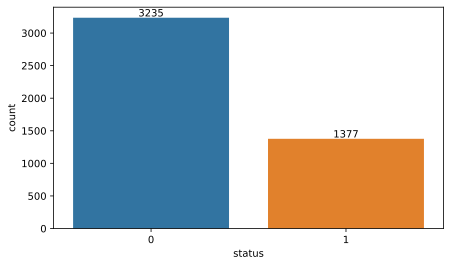

In [12]:
plt.figure(figsize=(7, 4))

ax = sns.countplot(x='status', data=data)

# Let's annotate the exact count on the top of the bar for each category 
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                ha="center",
                va="center",
                size=10,
                xytext=(0, 4),
                textcoords="offset points")

- The above plot shows that number of leads converted is significantly less than number of leads not converted which can be expected.
- The plot indicates that **~30%** (1377/4612) of leads have been converted.

**Let's check the distribution and outliers for numerical columns in the data**

age
Skew : -0.72


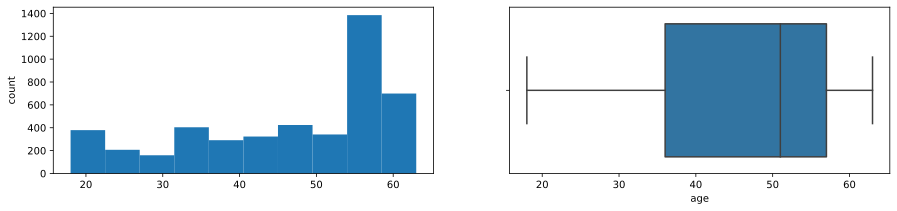

website_visits
Skew : 2.16


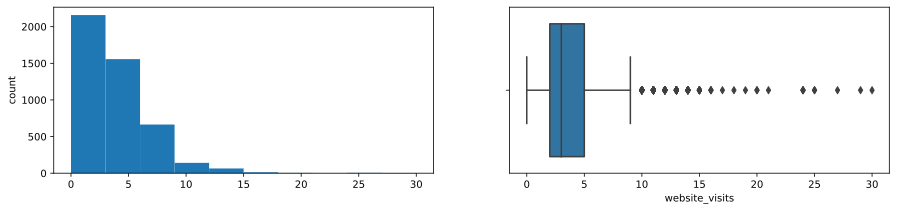

time_spent_on_website
Skew : 0.95


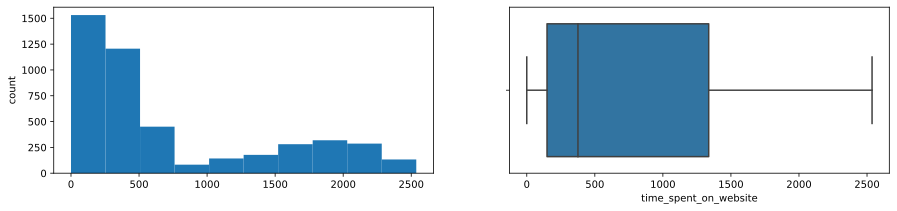

page_views_per_visit
Skew : 1.27


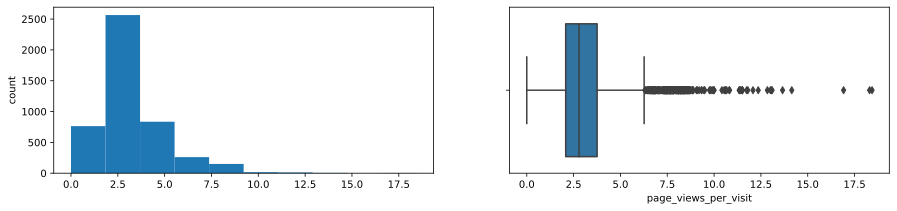

In [13]:
for col in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    
    print(col)  
    print('Skew :',round(data[col].skew(), 2))
    
    plt.figure(figsize=(15, 3))
    plt.subplot(1, 2, 1)
    data[col].hist(bins=10, grid=False)    
    plt.ylabel('count')    
    plt.subplot(1, 2, 2)   
    sns.boxplot(x=data[col])    
    plt.show()

**Observations:**

* The distribution is left skewed for age. 
* Website visits has right skewed distribution which is expected. There might be outliers in the data. 
* Website time spend also has right skewed distribution.
* Page views per visit can be approximated as normal with slight right skew. There might be outliers.

### **Checking for outliers**

In [14]:
# Let's check how many observations we have with website visits > 10
data[data['website_visits']>10]['website_visits'].sum()/len(data)

0.3603642671292281

**We see that these values contribute to quite big portion of the data. Let's change the threshold to 20.**


In [15]:
# Let's check how many observations we have with website visits > 10
data[data['website_visits']>20]['website_visits'].sum()/len(data)

0.049653078924544666

**Again this is quite big portion of the data. We will not treat these values now.**

In [16]:
# Let's check how many observations we have with page views per visit > 10
data[data['page_views_per_visit']>6]['page_views_per_visit'].sum()/len(data)

0.4750561578490893

**Again this is quite big portion of the data, plus ~18 pages per visit seems plausible as there are lots of people who carefully examine information before choosing a program. We will not treat these values now.**

### **Bivariate Analysis**

**We are done with univariate analysis and data preprocessing. Let's explore the data a bit more with bivariate analysis.**

Leads will have different expectations from the outcome of the course and their current occupation may play a key role for them to take the program. Let's analyze it.

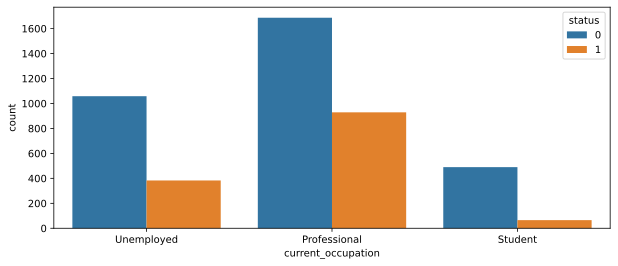

In [17]:
plt.figure(figsize=(10, 4))
sns.countplot(x='current_occupation', hue='status', data=data)
plt.show()

**Observations:**

- The plot shows that working professional leads are more likely to opt for a course offered by the organization and the students are least likely to be converted. 
- This shows that the currently offered programs are more oriented toward working professionals or unemployed personnel. The programs might be suitable for the working professionals who might want to transition to a new role or take up more responsibility in their current role. And also focused on skills that are in high demand making it more suitable for working professionals or currently unemployed leads.

**Age can also be a good factor to differentiate between such leads. Let's explore this.**

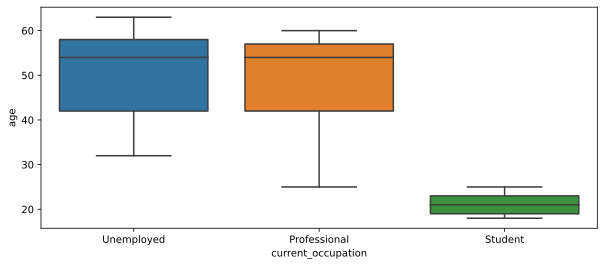

In [18]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='current_occupation', y='age', data=data)
plt.show()

In [19]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


**Observations:**

* The range of age for students is 18 to 25 years.
* The range of age for professionals is 25 to 60 years.
* The range of age for unemployed leads is 32 to 63 years.
* The average age of working professionals and unemployed leads is almost 50 years.

**The company's first interaction with leads should be compelling and persuasive. Let's see if the channels of the first interaction have an impact on the conversion of leads.**

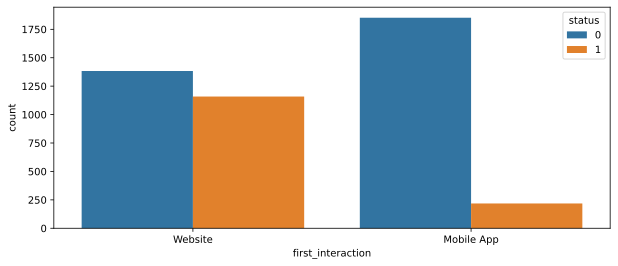

In [20]:
plt.figure(figsize=(10, 4))
sns.countplot(x='first_interaction', hue='status', data=data)
plt.show()

**Observations:**

* The website seems to be doing a good job as compared to mobile app as there is a huge difference in the number of conversions of the leads who first interacted with the company through website and those who interacted through mobile application.
* Majority of the leads who interacted through websites were converted to paid customers, while only a small number of leads, who interacted through mobile app, converted. As more people tend to use mobile devices and applications. It might be beneficial to explore why there is such low conversion through application. May be it lacks important information or inconvinient to use. 

**We observed earlier that some leads spend more time on websites than others. Let's analyze if spending more time on websites results in conversion.**

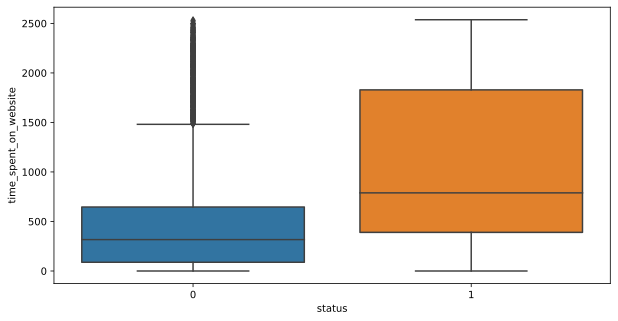

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="status", y="time_spent_on_website", data=data)
plt.show()

**Observations:**

* We see that the more time a person spends on the website the more chances that she will be converted. So it's really important to catch and keep the leads attention.

**People browsing the website or the mobile app are generally required to create a profile by sharing their details before they can access more information. Let's see if the profile completion level has an impact on lead coversion**

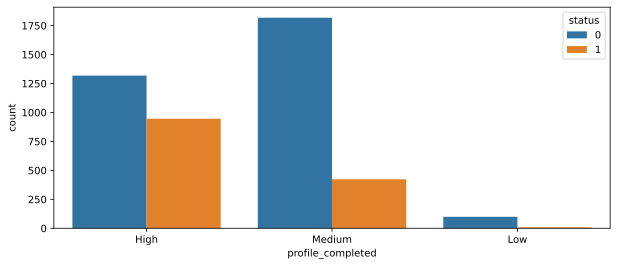

In [22]:
plt.figure(figsize=(10, 4))
sns.countplot(x='profile_completed', hue='status', data=data)
plt.show()

**Observations:**

* The leads whose profile completion level is high converted more in comparison to other levels of profile completion.
* The medium and low levels of profile completion saw comparatively much less conversions.
* The high level of profile completion might indicate a lead's intent to pursue the course which results in high conversion.

**Referrals from a converted lead can be a good source of income with a very low cost of advertisement. Let's see how referrals impact lead conversion status.**

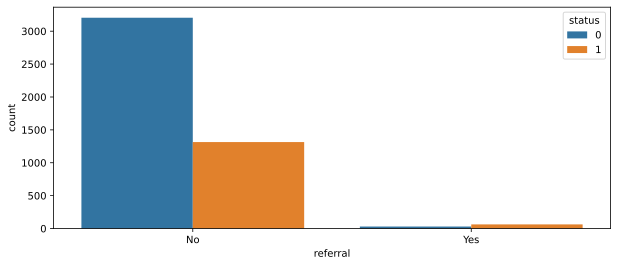

In [23]:
plt.figure(figsize=(10, 4))
sns.countplot(x='referral', hue='status', data=data)
plt.show()

**Observations:**
* There are a very few number of referrals but the conversion is multiplied relative to this number. 
* The company should try to get more leads through referrals by promoting rewards for existing customer base when they refer someone.

**Let's explore correlation between the variables.**

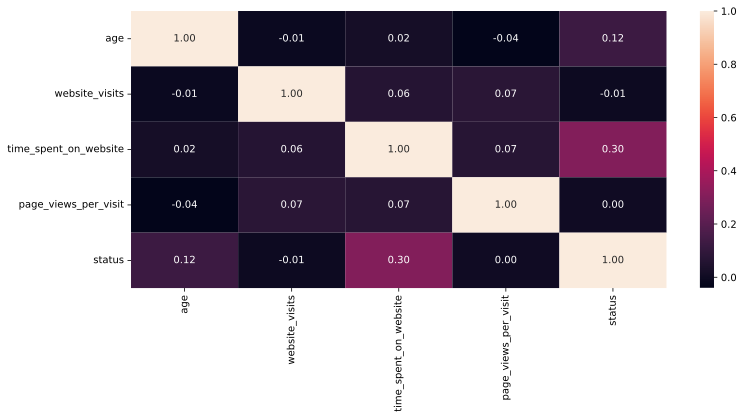

In [24]:
plt.figure(figsize=(12, 5))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

**Observations:**

- The correlation between the variables is rather low. That means that the variables are close to be orthogonal. 
- There is slight correlation between status and time spent on the website, which we explored before.
- All other correlations are neglibible. 

## **Data preparation for modeling**

In [25]:
# Let's separate the target variable and other variables
X = data.drop(columns='status')
Y = data['status']

In [26]:
# Creating dummy variables, drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first=True)

In [27]:
# Let's split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=1)

**Checking the shape of the train and test data**

In [28]:
print("Shape of the training set: ", X_train.shape)   
print("Shape of the test set: ", X_test.shape)
print('-'*100)
print("Percentage of classes in the training set:")
print(y_train.value_counts(normalize = True))
print('-'*100)
print("Percentage of classes in the test set:")
print(y_test.value_counts(normalize = True))

Shape of the training set:  (3228, 16)
Shape of the test set:  (1384, 16)
----------------------------------------------------------------------------------------------------
Percentage of classes in the training set:
0    0.701363
1    0.298637
Name: status, dtype: float64
----------------------------------------------------------------------------------------------------
Percentage of classes in the test set:
0    0.70159
1    0.29841
Name: status, dtype: float64


## **Building Classification Models**

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem at hand.**

### **Model evaluation criterion**

**Model can make wrong predictions as:**

1. Predicting a lead will not be converted to a paid customer but, in reality, the lead would have converted to a paid customer.
2. Predicting a lead will be converted to a paid customer but, in reality, the lead would have not converted to a paid customer. 

### **Which case is more important?** 

* If we predict that a lead will not get converted and the lead would might have been converted then the company will lose a potential customer. 

* If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false-positive cases.

Losing a potential customer is a greater loss for the organization.

### **How to reduce the losses?**

* Company would want `Recall` to be maximized. The greater the Recall score, higher the chances of minimizing False Negatives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [64]:
def metrics_score(actual, predicted):
    
    print(classification_report(actual, predicted,digits=4))   
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 5))    
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])    
    plt.ylabel('Actual')    
    plt.xlabel('Predicted')    
    plt.show()

## **Model Selection**

We are going to explore multiple types of models in order to find the best fit for the task at hand. 
So let's create the initial list of models to check and build up from there. 

In [31]:
# Let's instantiate the models
lr = LogisticRegression(random_state=1)
dTree = DecisionTreeClassifier(random_state=1)
LD = LinearDiscriminantAnalysis()
QD = QuadraticDiscriminantAnalysis()
bagging = BaggingClassifier(random_state=1)
bagging_dTree = BaggingClassifier(base_estimator=dTree,random_state=1)
xTree=ExtraTreesClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)
GBoost = GradientBoostingClassifier(random_state=1)
naive_bayes = GaussianNB()
ada_dTree=AdaBoostClassifier(base_estimator=dTree, random_state=1)
ada_rf = AdaBoostClassifier(base_estimator=rf)
vote=VotingClassifier(estimators=[('dTree', dTree),
                                  ('bagging',bagging),
                                  ('xTree',xTree), 
                                  ('rf',rf),
                                  ('GBoost',GBoost),
                                  ('naive_bayes',naive_bayes)],
                      voting='soft'
                      ,n_jobs=-1)

In [33]:
models=[lr,
        dTree,
        LD,
        QD,
        bagging,
        bagging_dTree,
        xTree,
        rf,
        GBoost,
        naive_bayes,
        ada_dTree,
        ada_rf,
        vote]
model_names=['lr','dTree','LD','QD','bagging','bagging_dTree','xTree',
             'rf','GBoost','naive_bayes','ada_dTree','ada_rf','vote']

In [34]:
for i, model in enumerate(models):
    model.fit(X_train,y_train)
    pred_train=model.predict(X_train)
    pred_test=model.predict(X_test)
    print(model_names[i],':',"{:.4f}".format(accuracy_score(y_train,pred_train)),'|',"{:.4f}".format(accuracy_score(y_test,pred_test)))

lr : 0.8166 | 0.8237
dTree : 0.9994 | 0.8085
LD : 0.8160 | 0.8201
QD : 0.8330 | 0.8244
bagging : 0.9851 | 0.8447
bagging_dTree : 0.9851 | 0.8447
xTree : 0.9994 | 0.8432
rf : 0.9994 | 0.8584
GBoost : 0.8860 | 0.8605
naive_bayes : 0.7838 | 0.7962
ada_dTree : 0.9994 | 0.7934
ada_rf : 0.9994 | 0.8526
vote : 0.9994 | 0.8613


**Observations**:

- All of the classifier provide decent results, but apprioximately half of them overfitting.  
- The best result on the test set achieved by vote, GBoost and random forest. Among this models only GBoost is not overfitting. 
- We will try to get the most of the GBoost and also to explore what we can achieve with XGBoost and LightGBM models which are a very potent classifiers. 

### Let's check the metrics on the current GBoost Model

              precision    recall  f1-score   support

           0     0.9115    0.9276    0.9194      2264
           1     0.8225    0.7884    0.8051       964

    accuracy                         0.8860      3228
   macro avg     0.8670    0.8580    0.8623      3228
weighted avg     0.8849    0.8860    0.8853      3228



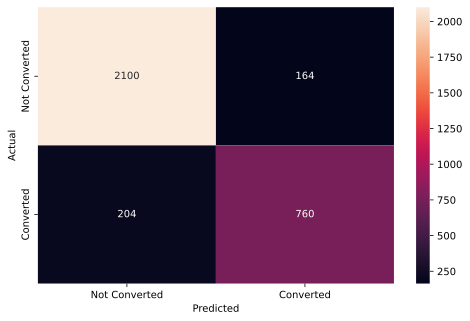

In [65]:
pred_train=GBoost.predict(X_train)
metrics_score(y_train, pred_train)

              precision    recall  f1-score   support

           0     0.8945    0.9083    0.9014       971
           1     0.7764    0.7482    0.7620       413

    accuracy                         0.8605      1384
   macro avg     0.8355    0.8283    0.8317      1384
weighted avg     0.8593    0.8605    0.8598      1384



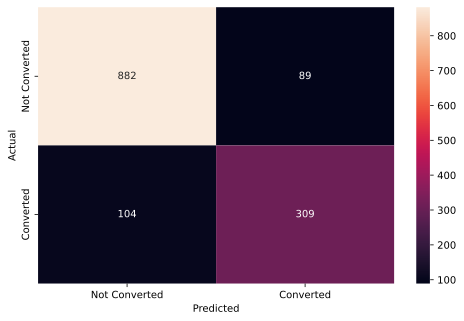

In [66]:
pred_test=GBoost.predict(X_test)
metrics_score(y_test,pred_test)

**Observations:**

* The model shows no signs of overfitting
* The is a lower F1 score for class converted compared to non-converted. 
* But overall accuracy is high. 

### GBoost Model Tuning

In [ ]:
from hpsklearn import gradient_boosting_classifier
import sys

with warnings.catch_warnings():
    
    warnings.simplefilter("ignore")
    
    GBoost_classifier = HyperoptEstimator(classifier=gradient_boosting_classifier('GBoost_classifier'),
                                      preprocessing=any_preprocessing('pre'), 
                                      algo=tpe.suggest,
                                      max_evals=100,
                                      trial_timeout=300)

    # perform the search
    GBoost_classifier.fit(X_train.values, y_train.values)

In [55]:
GBoost_classifier.best_model()

{'learner': GradientBoostingClassifier(learning_rate=0.019898231186781065, loss='deviance',
                            max_depth=2, max_features=0.26070056807383185,
                            n_estimators=667, random_state=2, verbose=False),
 'preprocs': (PCA(n_components=16),),
 'ex_preprocs': ()}

In [67]:
print("Train Acc","|","Test Acc")
print('{:.4f}'.format(GBoost_classifier.score(X_train,y_train)),'|','{:.4f}'.format(GBoost_classifier.score(X_test,y_test)))

Train Acc | Test Acc
0.8860 | 0.8605


In [98]:
# Let's preprocess the features according to the above finding
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [99]:
GBoost_model = GBoost_classifier.best_model()['learner']

              precision    recall  f1-score   support

           0     0.9044    0.9280    0.9161      2264
           1     0.8199    0.7697    0.7940       964

    accuracy                         0.8807      3228
   macro avg     0.8622    0.8489    0.8550      3228
weighted avg     0.8792    0.8807    0.8796      3228



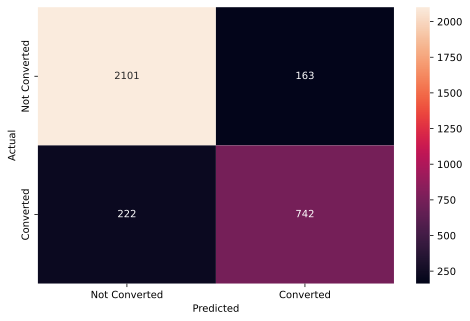

In [100]:
pred_train_gboost=GBoost_model.predict(X_train_pca)
metrics_score(y_train, pred_train_gboost)

              precision    recall  f1-score   support

           0     0.8880    0.9228    0.9051       971
           1     0.8000    0.7264    0.7614       413

    accuracy                         0.8642      1384
   macro avg     0.8440    0.8246    0.8332      1384
weighted avg     0.8617    0.8642    0.8622      1384



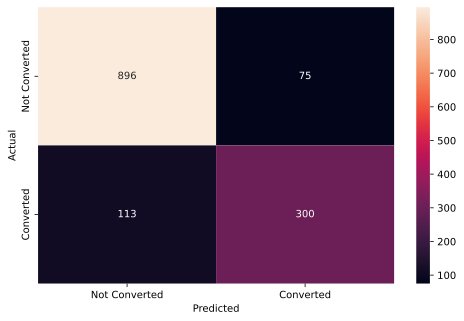

In [101]:
pred_test_gboost=GBoost_model.predict(X_test_pca)
metrics_score(y_test, pred_test_gboost)

**Observations:**

* The model shows no signs of overfitting and we managed to slightly improve the performance. 
* The is a still lower F1 score for class converted compared to non-converted. 
* But recall for class 1 dropped. 
* So we conclude that the first model is better. 

### **XGBoost Classifier**

In [69]:
from hpsklearn import xgboost_classification

xgboost = HyperoptEstimator(classifier=xgboost_classification('xgboost'), preprocessing=any_preprocessing('pre'), 
                            algo=tpe.suggest, max_evals=100, trial_timeout=300)
# let's perform the search
xgboost.fit(X_train.values, y_train.values)

100%|██████████| 100/100 [00:02<00:00,  2.22s/trial, best loss: 0.1331269349845201]


In [70]:
xgboost.best_model()

{'learner': XGBClassifier(base_score=0.5, booster=None, callbacks=None,
               colsample_bylevel=0.6649952380770802, colsample_bynode=None,
               colsample_bytree=0.9716320904313864, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.03648591765199393, gpu_id=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.00037114713731462414, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
               max_depth=9, max_leaves=None, min_child_weight=2, missing=nan,
               monotone_constraints=None, n_estimators=2200, n_jobs=1,
               num_parallel_tree=None, predictor=None, random_state=None, ...),
 'preprocs': (StandardScaler(with_std=False),),
 'ex_preprocs': ()}

In [71]:
print("Train Acc","|","Test Acc")
print('{:.4f}'.format(xgboost.score(X_train,y_train)),'|','{:.4f}'.format(xgboost.score(X_test,y_test)))

Train Acc | Test Acc
0.8941 | 0.8649


In [72]:
xgb_classifier = xgboost.best_model()['learner']
xgb_params = xgb_classifier.get_params()
xgb_params

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': 0.6649952380770802,
 'colsample_bynode': None,
 'colsample_bytree': 0.9716320904313864,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0.03648591765199393,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.00037114713731462414,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': 0,
 'max_depth': 9,
 'max_leaves': None,
 'min_child_weight': 2,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 2200,
 'n_jobs': 1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': 0.014275998087303763,
 'reg_lambda': 2.3552537748221054,
 'sampling_method': None,
 'scale_pos_weight': 1,
 'subsample': 0.8654827112198489,
 'tree_method': None,

In [74]:
StandardScaler = preprocessing.StandardScaler(with_std=False).fit(pd.concat([X_train,X_test],axis=0))
X_train_zscored = StandardScaler.transform(X_train)
X_test_zscored = StandardScaler.transform(X_test)

In [77]:
xgbmodel=xgb.XGBClassifier(**xgb_params)

In [127]:
xgb_params = xgbmodel.get_xgb_params()
xgtrain = xgb.DMatrix(X_train_zscored, y_train)
cvresult = xgb.cv(xgb_params, xgtrain, num_boost_round=xgbmodel.get_params()['n_estimators'], nfold=5,
metrics='error', early_stopping_rounds=100)
xgbmodel.set_params(n_estimators=cvresult.shape[0])

XGBClassifier(base_score=0.5, booster=None, callbacks=None,
              colsample_bylevel=0.6649952380770802, colsample_bynode=None,
              colsample_bytree=0.9716320904313864, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.03648591765199393, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.00037114713731462414, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=9, max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, n_estimators=28, n_jobs=1,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [129]:
# Let's add  train and validation accuracies to the history
cvresult['Train Accuracy']=1-cvresult['train-error-mean']
cvresult['Validation Accuracy']=1-cvresult['test-error-mean']
cvresult.drop(['train-error-mean','train-error-std','test-error-mean','test-error-std'],axis=1,inplace=True)
cvresult

,Train Accuracy,Validation Accuracy
0,0.878795,0.846030
1,0.878484,0.850986
2,0.879956,0.851916
3,0.882976,0.853465
4,0.883674,0.852845
5,0.883519,0.853160
6,0.883829,0.854704
7,0.885223,0.856564
8,0.884758,0.858111
9,0.885223,0.856872


In [130]:
xgbmodel.fit(X_train_zscored,y_train)

XGBClassifier(base_score=0.5, booster=None, callbacks=None,
              colsample_bylevel=0.6649952380770802, colsample_bynode=None,
              colsample_bytree=0.9716320904313864, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.03648591765199393, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.00037114713731462414, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=9, max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, n_estimators=28, n_jobs=1,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [131]:
y_pred_train_xgb=xgbmodel.predict(X_train_zscored)
y_pred_test_xgb=xgbmodel.predict(X_test_zscored)
print("Train Acc","|","Test Acc")

print('{:.4f}'.format(accuracy_score(y_train,y_pred_train_xgb)),'|','{:.4f}'.format(accuracy_score(y_test,y_pred_test_xgb)))

Train Acc | Test Acc
0.8823 | 0.8678


              precision    recall  f1-score   support

           0     0.8965    0.9408    0.9181      2264
           1     0.8427    0.7448    0.7907       964

    accuracy                         0.8823      3228
   macro avg     0.8696    0.8428    0.8544      3228
weighted avg     0.8804    0.8823    0.8801      3228



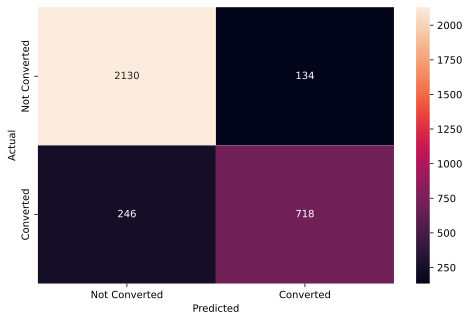

In [132]:
metrics_score(y_train, y_pred_train_xgb)

              precision    recall  f1-score   support

           0     0.8840    0.9341    0.9084       971
           1     0.8212    0.7119    0.7626       413

    accuracy                         0.8678      1384
   macro avg     0.8526    0.8230    0.8355      1384
weighted avg     0.8653    0.8678    0.8649      1384



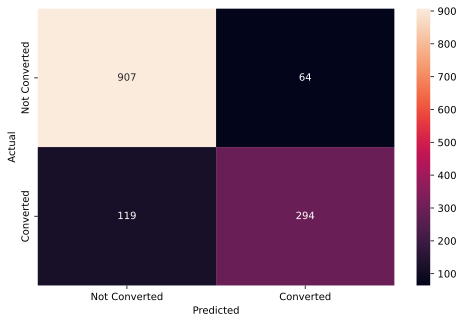

In [133]:
metrics_score(y_test, y_pred_test_xgb)

**Observations:**

* The accuracy slightly improved compared to the GBoost models
* But recall on the class 1 is poorer on the both

**Let's try to increase the recall by changing the scale_pos_weight parameter**

In [143]:
xgb_params={'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': 0.6649952380770802,
 'colsample_bynode': None,
 'colsample_bytree': 0.9716320904313864,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0.03648591765199393,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.00037114713731462414,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': 0,
 'max_depth': 9,
 'max_leaves': None,
 'min_child_weight': 2,
 'monotone_constraints': None,
 'n_estimators': 2200,
 'n_jobs': 1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': 0.014275998087303763,
 'reg_lambda': 2.3552537748221054,
 'sampling_method': None,
 'scale_pos_weight': 2, # we increase this parameter from 1 to 2 
 'subsample': 0.8654827112198489,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'seed': 4}

In [136]:
xgbmodel=xgb.XGBClassifier(**xgb_params)

In [137]:
xgb_params = xgbmodel.get_xgb_params()
xgtrain = xgb.DMatrix(X_train_zscored, y_train)
cvresult = xgb.cv(xgb_params, xgtrain, num_boost_round=xgbmodel.get_params()['n_estimators'], nfold=5,
metrics='error', early_stopping_rounds=100)
xgbmodel.set_params(n_estimators=cvresult.shape[0])

XGBClassifier(base_score=0.5, booster=None, callbacks=None,
              colsample_bylevel=0.6649952380770802, colsample_bynode=None,
              colsample_bytree=0.9716320904313864, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.03648591765199393, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.00037114713731462414, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=9, max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, n_estimators=12, n_jobs=1,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [138]:
# Let's add  train and validation accuracies to the history
cvresult['Train Accuracy']=1-cvresult['train-error-mean']
cvresult['Validation Accuracy']=1-cvresult['test-error-mean']
cvresult.drop(['train-error-mean','train-error-std','test-error-mean','test-error-std'],axis=1,inplace=True)
cvresult

,Train Accuracy,Validation Accuracy
0,0.873993,0.828373
1,0.877632,0.844790
2,0.884757,0.847577
3,0.884526,0.850675
4,0.883984,0.846647
5,0.884293,0.847267
6,0.884526,0.843240
7,0.885920,0.845099
8,0.886849,0.845718
9,0.887701,0.846647


In [139]:
xgbmodel.fit(X_train_zscored,y_train)

XGBClassifier(base_score=0.5, booster=None, callbacks=None,
              colsample_bylevel=0.6649952380770802, colsample_bynode=None,
              colsample_bytree=0.9716320904313864, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.03648591765199393, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.00037114713731462414, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=9, max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, n_estimators=12, n_jobs=1,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [140]:
y_pred_train_xgb=xgbmodel.predict(X_train_zscored)
y_pred_test_xgb=xgbmodel.predict(X_test_zscored)
print("Train Acc","|","Test Acc")

print('{:.4f}'.format(accuracy_score(y_train,y_pred_train_xgb)),'|','{:.4f}'.format(accuracy_score(y_test,y_pred_test_xgb)))

Train Acc | Test Acc
0.8872 | 0.8504


In [144]:
print(classification_report(y_train, y_pred_train_xgb,digits=4)) 

              precision    recall  f1-score   support

           0     0.9439    0.8922    0.9173      2264
           1     0.7757    0.8755    0.8226       964

    accuracy                         0.8872      3228
   macro avg     0.8598    0.8839    0.8700      3228
weighted avg     0.8937    0.8872    0.8891      3228



In [145]:
print(classification_report(y_test, y_pred_test_xgb,digits=4)) 

              precision    recall  f1-score   support

           0     0.9108    0.8723    0.8911       971
           1     0.7269    0.7990    0.7612       413

    accuracy                         0.8504      1384
   macro avg     0.8188    0.8357    0.8262      1384
weighted avg     0.8559    0.8504    0.8524      1384



**Observations:**

* Overall accuracy slightly dropped, but the recall on the class one improved drastically.
* The recall on the class 0 is still higher than the recall on the class 1.

**Let's balance the recall on both classes further.**

In [162]:
xgb_params['scale_pos_weight']=2.8

In [163]:
xgbmodel=xgb.XGBClassifier(**xgb_params)

In [164]:
xgb_params = xgbmodel.get_xgb_params()
xgtrain = xgb.DMatrix(X_train_zscored, y_train)
cvresult = xgb.cv(xgb_params, xgtrain, num_boost_round=xgbmodel.get_params()['n_estimators'], nfold=5,
metrics='error', early_stopping_rounds=100)
xgbmodel.set_params(n_estimators=cvresult.shape[0])

XGBClassifier(base_score=0.5, booster=None, callbacks=None,
              colsample_bylevel=0.6649952380770802, colsample_bynode=None,
              colsample_bytree=0.9716320904313864, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.03648591765199393, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.00037114713731462414, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=9, max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=1,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [165]:
# Let's add  train and validation accuracies to the history
cvresult['Train Accuracy']=1-cvresult['train-error-mean']
cvresult['Validation Accuracy']=1-cvresult['test-error-mean']
cvresult.drop(['train-error-mean','train-error-std','test-error-mean','test-error-std'],axis=1,inplace=True)

In [166]:
xgbmodel.fit(X_train_zscored,y_train)

XGBClassifier(base_score=0.5, booster=None, callbacks=None,
              colsample_bylevel=0.6649952380770802, colsample_bynode=None,
              colsample_bytree=0.9716320904313864, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.03648591765199393, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.00037114713731462414, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=9, max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=1,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [167]:
y_pred_train_xgb=xgbmodel.predict(X_train_zscored)
y_pred_test_xgb=xgbmodel.predict(X_test_zscored)
print("Train Acc","|","Test Acc")

print('{:.4f}'.format(accuracy_score(y_train,y_pred_train_xgb)),'|','{:.4f}'.format(accuracy_score(y_test,y_pred_test_xgb)))

Train Acc | Test Acc
0.8786 | 0.8360


In [168]:
print(classification_report(y_train, y_pred_train_xgb,digits=4)) 

              precision    recall  f1-score   support

           0     0.9671    0.8560    0.9082      2264
           1     0.7337    0.9315    0.8208       964

    accuracy                         0.8786      3228
   macro avg     0.8504    0.8938    0.8645      3228
weighted avg     0.8974    0.8786    0.8821      3228



In [169]:
print(classification_report(y_test, y_pred_test_xgb,digits=4)) 

              precision    recall  f1-score   support

           0     0.9218    0.8373    0.8775       971
           1     0.6853    0.8329    0.7519       413

    accuracy                         0.8360      1384
   macro avg     0.8035    0.8351    0.8147      1384
weighted avg     0.8512    0.8360    0.8400      1384



**Observations:**

* Overall accuracy again slightly dropped, but the recall is very even on the both classes

**Let's try LightGBM Model now**

In [31]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

### **LightGBM Classifier**

Let's try LightGBM Classifier, which might be promising algorithm. 

In [87]:
from hpsklearn import lightgbm_classification
lightgbm_model = HyperoptEstimator(classifier=lightgbm_classification('lgbm'), preprocessing=any_preprocessing('pre'), 
                            algo=tpe.suggest, max_evals=100, trial_timeout=300)
# perform the search
lightgbm_model.fit(X_train.values, y_train.values)

100%|██████████| 100/100 [00:02<00:00,  2.79s/trial, best loss: 0.13157894736842102]


In [88]:
lightgbm_model.best_model()

{'learner': LGBMClassifier(colsample_bytree=0.5566086159376296,
                learning_rate=0.00038263206043851155, max_delta_step=0,
                max_depth=5, min_child_weight=1, n_estimators=5600, n_jobs=1,
                num_leaves=37, objective='binary', reg_alpha=0.9842373613831831,
                reg_lambda=3.1196387109216213, scale_pos_weight=1, seed=0,
                subsample=0.7249261662199203),
 'preprocs': (PCA(n_components=16, whiten=True),),
 'ex_preprocs': ()}

In [102]:
# Let's preprocess the features according to the above finding
pca_whiten = PCA(n_components=16,whiten=True)
X_train_pca_whiten = pca.fit_transform(X_train)
X_test_pca_whiten = pca.transform(X_test)

In [103]:
lightgbm_model = lightgbm_model.best_model()['learner']

In [108]:
pred_train_lgbm=lightgbm_model.predict(X_train_pca_whiten)
pred_test_lgbm=lightgbm_model.predict(X_test_pca_whiten)
print("Train Acc","|","Test Acc")

print('{:.4f}'.format(accuracy_score(y_train,pred_train_lgbm)),'|','{:.4f}'.format(accuracy_score(y_test,pred_test_lgbm)))

Train Acc | Test Acc
0.7175 | 0.7168


              precision    recall  f1-score   support

           0     0.7132    0.9987    0.8322      2264
           1     0.9483    0.0571    0.1076       964

    accuracy                         0.7175      3228
   macro avg     0.8308    0.5279    0.4699      3228
weighted avg     0.7834    0.7175    0.6158      3228



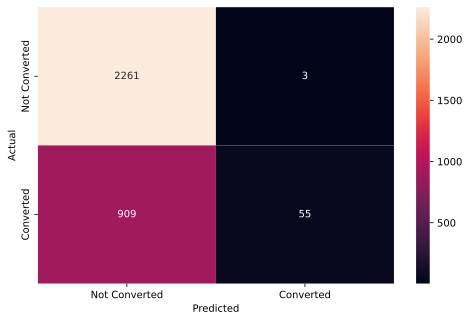

In [104]:
pred_train_lgbm=lightgbm_model.predict(X_train_pca_whiten)
metrics_score(y_train, pred_train_lgbm)

              precision    recall  f1-score   support

           0     0.7133    0.9969    0.8316       971
           1     0.8889    0.0581    0.1091       413

    accuracy                         0.7168      1384
   macro avg     0.8011    0.5275    0.4704      1384
weighted avg     0.7657    0.7168    0.6160      1384



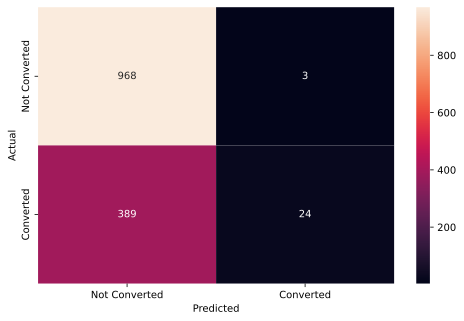

In [106]:
pred_test_lgbm=lightgbm_model.predict(X_test_pca_whiten)
metrics_score(y_test, pred_test_lgbm)

**Observations:**

* The LightGBM model show much poorer performance than the other models and fails in recall for the class converted. 
* We will not use this model. 

### We choose xgb model as the one giving us the best results.

## Feature Importance Analysis

In [170]:
# Importance of features in the tree building
print (pd.DataFrame(xgbmodel.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
first_interaction_Website       0.559218
profile_completed_Medium        0.143889
time_spent_on_website           0.061585
last_activity_Phone Activity    0.055397
current_occupation_Student      0.046552
last_activity_Website Activity  0.033057
profile_completed_Low           0.030567
current_occupation_Unemployed   0.019602
age                             0.012613
referral_Yes                    0.012455
page_views_per_visit            0.005664
website_visits                  0.005281
print_media_type1_Yes           0.004380
educational_channels_Yes        0.003812
digital_media_Yes               0.003517
print_media_type2_Yes           0.002410


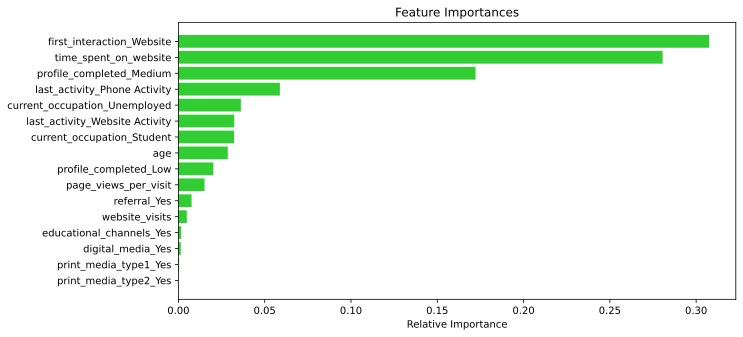

In [171]:
# Plotting the feature importance
importances = GBoost.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(10, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='limegreen', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
- **Time spent on the website and first_interaction_website are the most important features** **followed by profile_completed, last_activity and current occupation**.
- **The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not**.


## **Conclusion and Recommendations**

### **Conclusions:**

- We built the model (xgb) which predicts if a lead will be converted or not with high level of accuracy 83.6% and high and very balanced recall on both classes ~ 83.5%
- As the result of factor importances analysis we can conclude that the most important factors for leads conversion are:
    * if the first interaction was throug website
    * how much time was spent on the website
    * was the profile completed with Medium level of details
    * was the last activity done via phone
    * is the current occupation Unemployed. 

### **Business Recommendations**:

* To use the created model to predict will a lead be converted or not and use this information to prioritise staff efforts.
* Continue to build engagement of potential customers as time spent exploring information plays crucial role in conversion. 
* Explore userability of the mobile application. As we observed that conversion through the mobile app is drastically lower than through the website. May be the reason behind is that the application lacks some important information or is inconvinient to use. 
* Motivate potential customer to complete their profiles with High level of detail as its important factor for conversion. 
* Contact potential customers via phone to ensure conversion. 
* Build content around people who are currently employed as they are more likely to convert to payed customers.  